<a href="https://colab.research.google.com/github/Abdul-Subhan24/Netflix-Data-Visualization-ML/blob/main/Netflix_Data_Cleaning%2C_Analysis_and_Visualization_with_ML_Model's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("netflix data set's..csv")

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.shape

(8790, 10)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
df.drop(columns=['show_id'], inplace=True)


Exploratory Data Analysis (EDA)

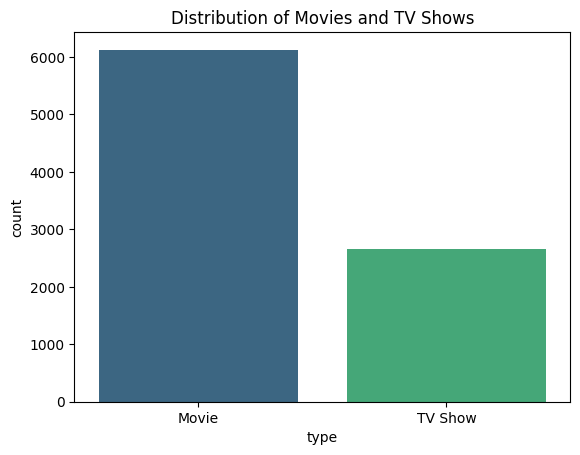

Text(0.5, 1.0, 'Total Content on Netflix by Type')

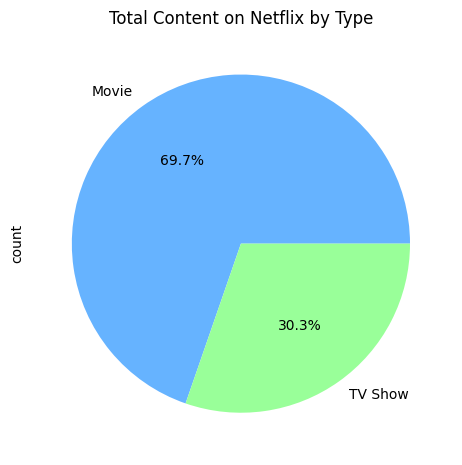

In [ ]:
# Visualize the Distribution of Movies and TV Shows:
sns.countplot(x='type', data=df, palette='viridis')
plt.title("Distribution of Movies and TV Shows")
plt.show()

# Total Content by Type
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title("Total Content on Netflix by Type")

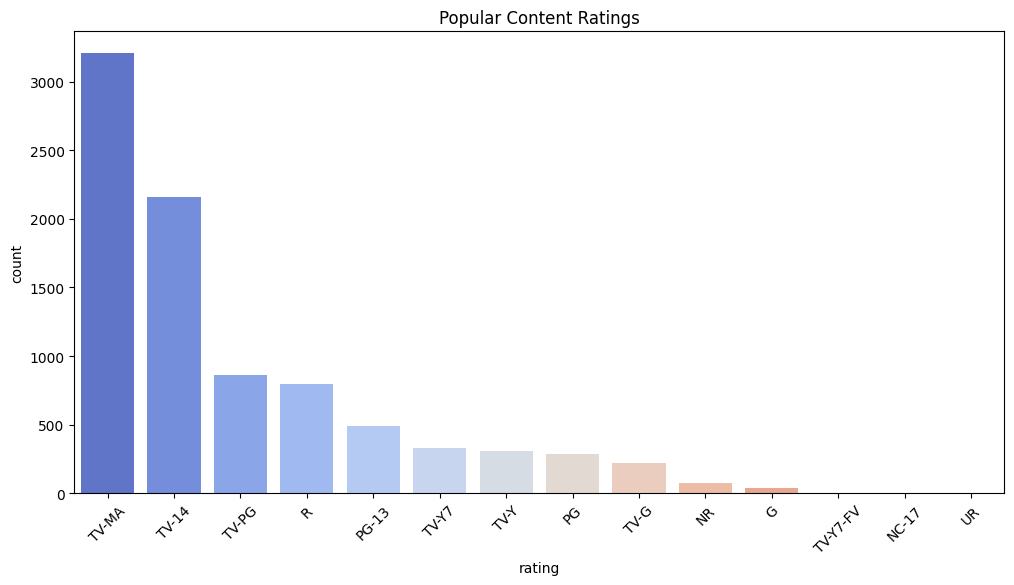

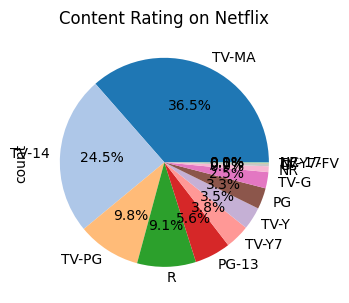

In [ ]:
# Popular Content Ratings:
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='coolwarm')
plt.title("Popular Content Ratings")
plt.xticks(rotation=45)
plt.show()

# Content Rating Distribution
plt.subplot(1, 2, 2)
df['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='tab20')
plt.title("Content Rating on Netflix")

plt.tight_layout()
plt.show()



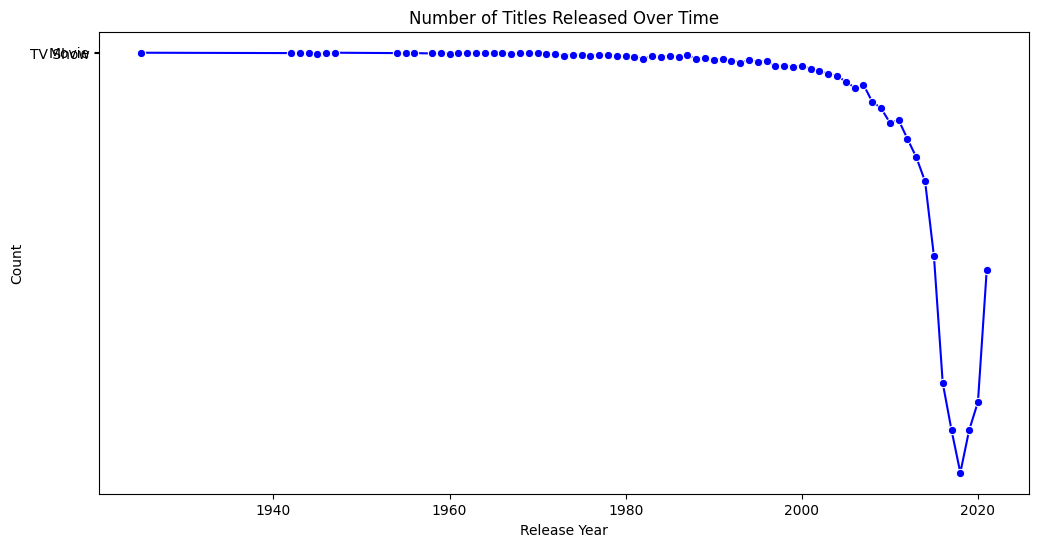

In [ ]:
# Analyze Content Over Time:
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='type', data=df, estimator=len, ci=None, marker='o', color='b')
plt.title("Number of Titles Released Over Time")
plt.ylabel("Count")
plt.xlabel("Release Year")
plt.show()

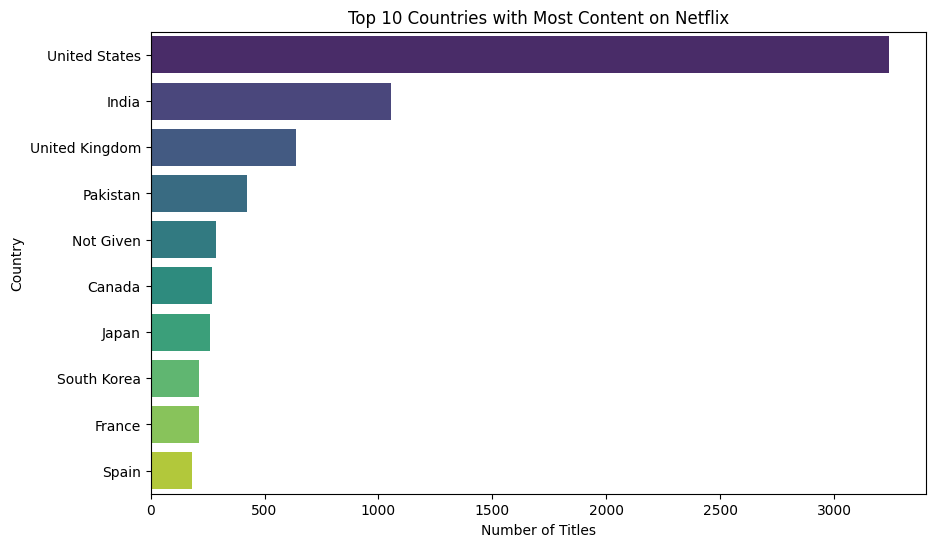

In [ ]:
# Top 10 Countries with Most Content on Netflix
top_10_countries = df['country'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
plt.title("Top 10 Countries with Most Content on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

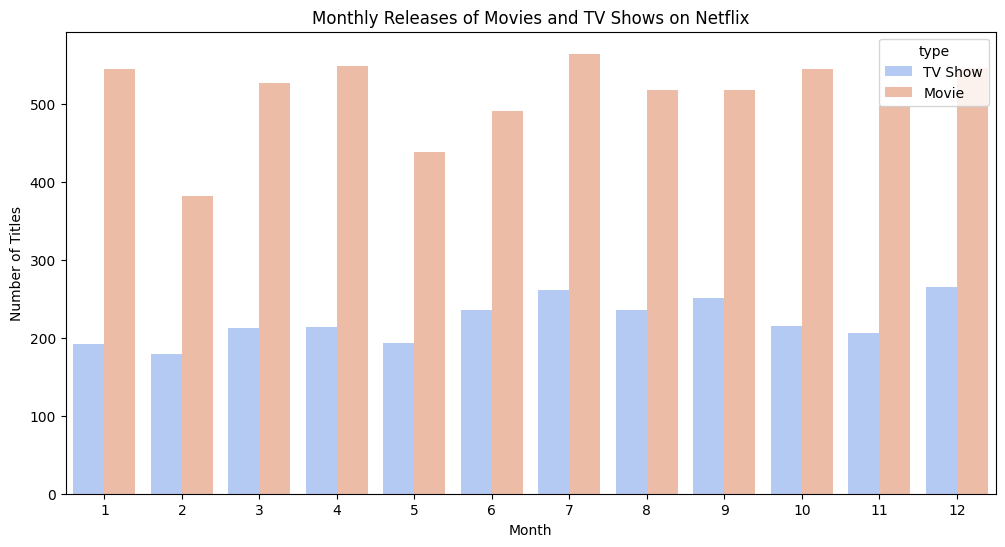

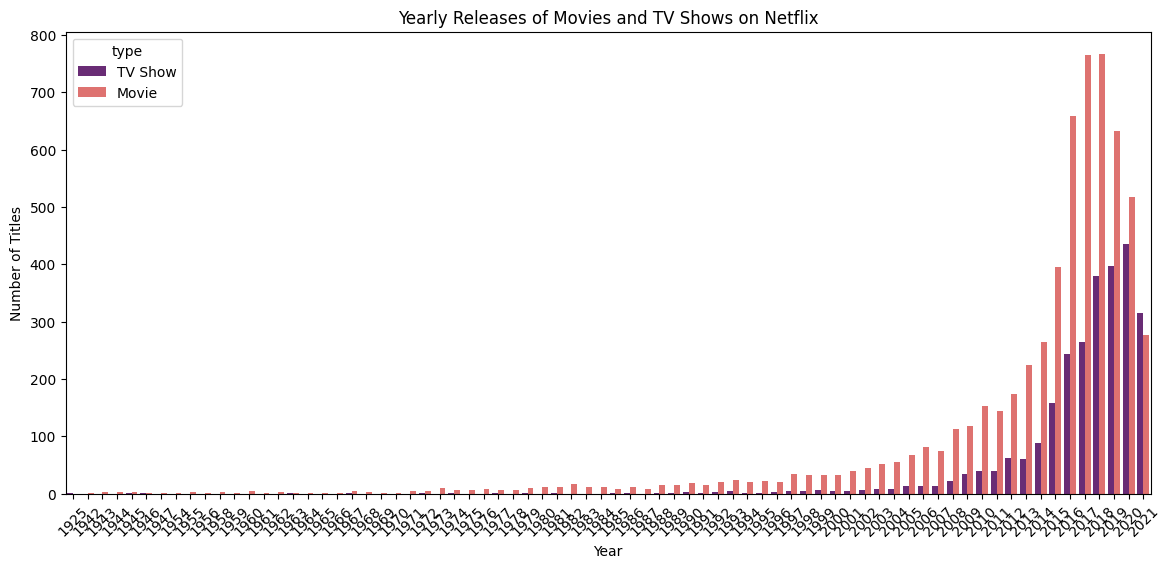

In [ ]:
#  Monthly Releases of Movies and TV Shows on Netflix
df['month_added'] = df['date_added'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(x='month_added', hue='type', data=df, palette='coolwarm')
plt.title("Monthly Releases of Movies and TV Shows on Netflix")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.show()

# Yearly Releases of Movies and TV Shows on Netflix
plt.figure(figsize=(14, 6))
sns.countplot(x='release_year', hue='type', data=df, palette='magma')
plt.title("Yearly Releases of Movies and TV Shows on Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

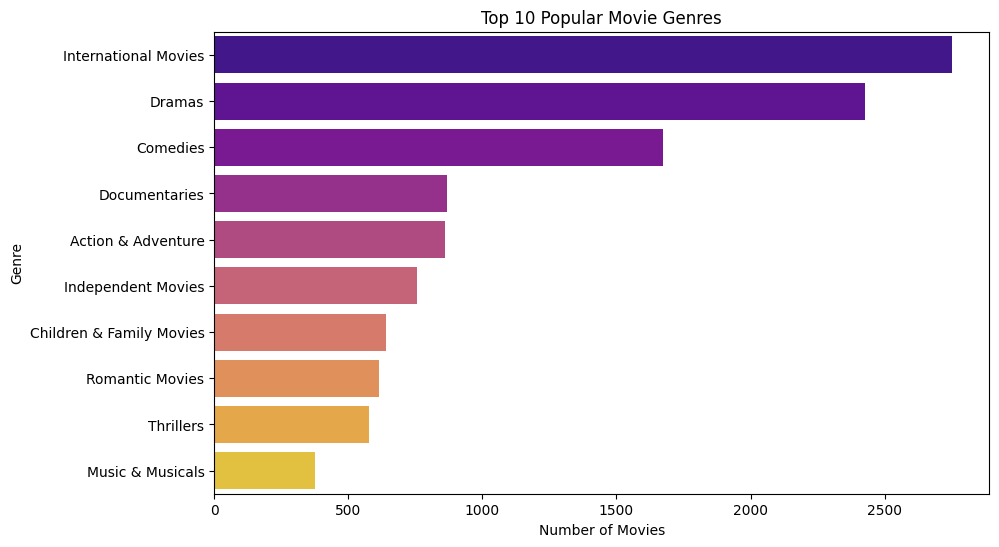

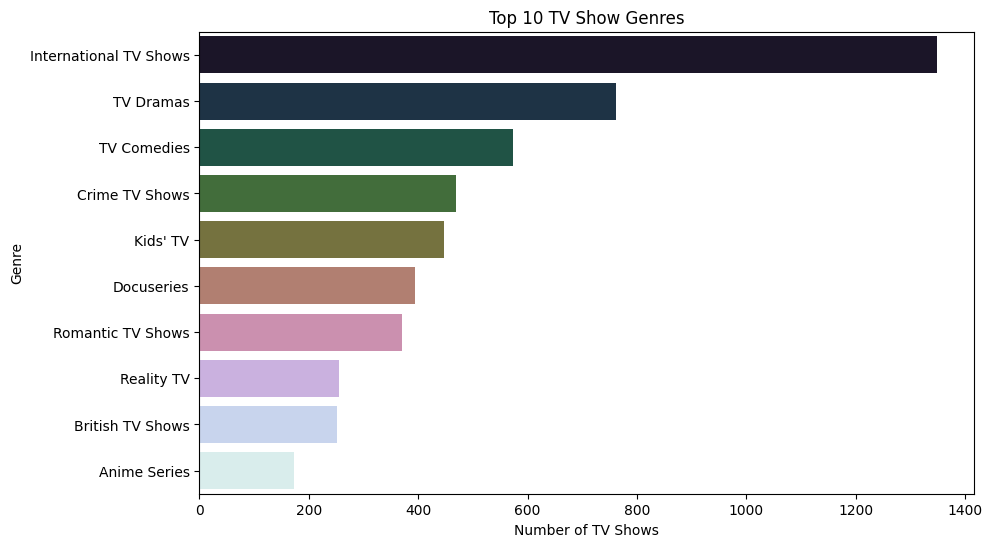

In [ ]:
# Top 10 Popular Movie Genres
movie_genres = df[df['type'] == 'Movie']['listed_in'].str.split(', ').explode().value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=movie_genres.values, y=movie_genres.index, palette='plasma')
plt.title("Top 10 Popular Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

# Top 10 TV Show Genres
tv_show_genres = df[df['type'] == 'TV Show']['listed_in'].str.split(', ').explode().value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=tv_show_genres.values, y=tv_show_genres.index, palette='cubehelix')
plt.title("Top 10 TV Show Genres")
plt.xlabel("Number of TV Shows")
plt.ylabel("Genre")
plt.show()


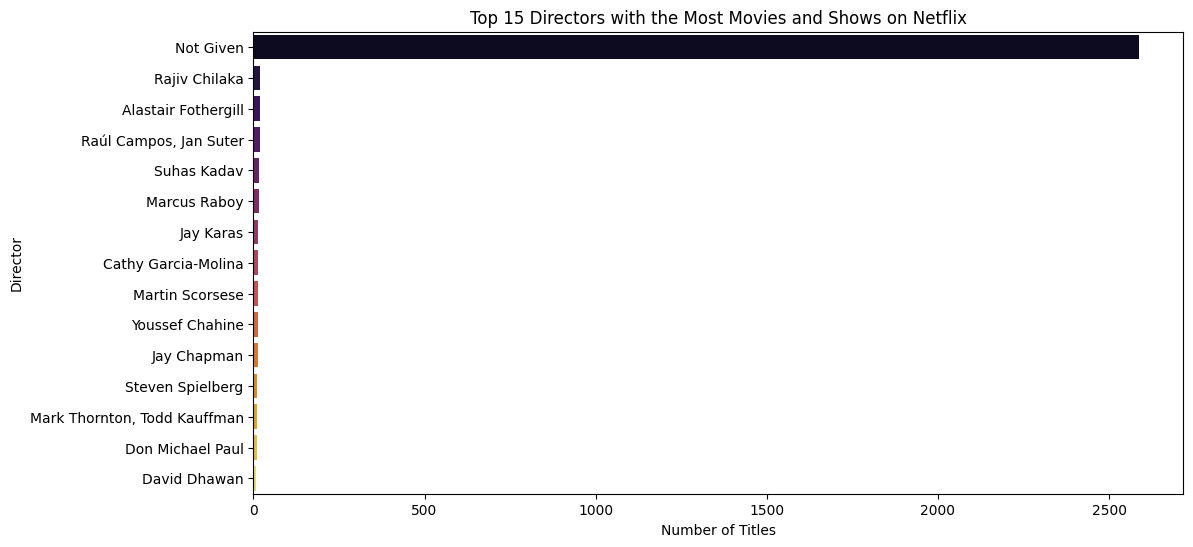

In [ ]:
# Top 15 Directors on Netflix with Most Content
top_15_directors = df['director'].value_counts().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_directors.values, y=top_15_directors.index, palette='inferno')
plt.title("Top 15 Directors with the Most Movies and Shows on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

Feature Engineering

In [ ]:
# Count the Number of Genres per Movie:
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(', ')))

# Extracting Duration in Minutes (Movies) or Number of Seasons (TV Shows)
def convert_duration(row):
    if 'Season' in row['duration']:
        return int(row['duration'].split(' ')[0])  # Number of seasons
    else:
        return int(row['duration'].split(' ')[0])  # Duration in minutes for movies

df['duration_numeric'] = df.apply(convert_duration, axis=1)


# Feature: Year when the content was added to Netflix
df['year_added'] = df['date_added'].dt.year

# Feature: Month when the content was added to Netflix
df['month_added'] = df['date_added'].dt.month

# Create a Feature for Content Type (0 for Movie, 1 for TV Show)
df['is_tv_show'] = df['type'].apply(lambda x: 1 if x == 'TV Show' else 0)
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,num_genres,duration_numeric,year_added,is_tv_show
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9,1,90,2021,0
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,3,1,2021,1
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,3,1,2021,1
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",9,2,91,2021,0
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",9,3,125,2021,0


Advanced Visualizations

In [ ]:
# Interactive Dashboards:
import plotly.express as px
# Content over years
fig = px.histogram(df, x='release_year', color='type', nbins=20, title="Content Released Over Years by Type")
fig.show()

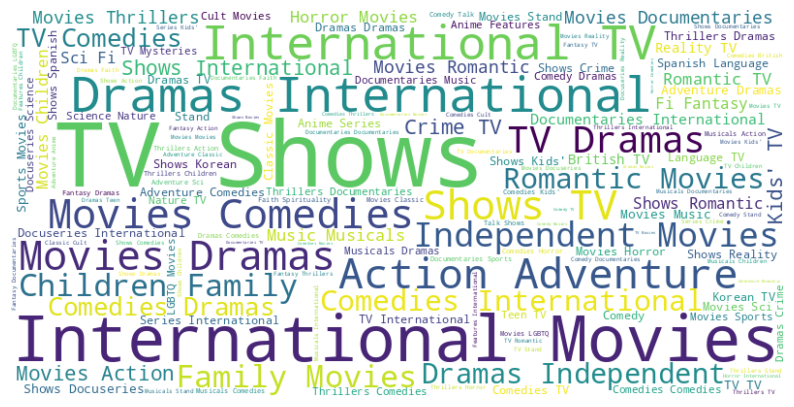

In [ ]:
# Genre word cloud
from wordcloud import WordCloud
genres = ' '.join(df['listed_in'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Display unique titles in the dataset to check for exact matches
print(df['title'].unique())


['Dick Johnson Is Dead' 'Ganglands' 'Midnight Mass' ...
 'Zindagi Gulzar Hai' 'Yoko' 'YOM']


In [ ]:
#  Machine Learning for Recommendations and Trend Predictions
# Import necessary libraries
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# For content-based recommendation based on genres
df['combined_features'] = df['listed_in'] + " " + df['director'].fillna('')

# Create the Count Vectorizer matrix
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['combined_features'])

# Compute the Cosine Similarity based on the count_matrix
cosine_sim = cosine_similarity(count_matrix)

# Function to get recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in df['title'].values:
        return f"'{title}' not found in the dataset."

    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

# Example of getting recommendations
print(get_recommendations('Ganglands'))

24            Bangkok Breaking
390     The Eagle of El-Se'eed
486                  The Truth
576              Fatal Destiny
2582               Nowhere Man
6693                Undercover
6738                     Lupin
7290                     Fauda
7531                    Chosen
7946              Monkey Twins
Name: title, dtype: object


In [ ]:
## Prepare Data for Trend Prediction:

# Convert 'release_year' to datetime for trend prediction
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce')

# Drop any rows with NaT in 'release_year'
df = df.dropna(subset=['release_year'])

# Extract year and group by count
yearly_counts = df.groupby(df['release_year'].dt.year).size()

# Set the index as the release year for time series analysis
yearly_counts.index = pd.to_datetime(yearly_counts.index, format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   type               8790 non-null   object        
 1   title              8790 non-null   object        
 2   director           8790 non-null   object        
 3   country            8790 non-null   object        
 4   date_added         8790 non-null   datetime64[ns]
 5   release_year       8790 non-null   datetime64[ns]
 6   rating             8790 non-null   object        
 7   duration           8790 non-null   object        
 8   listed_in          8790 non-null   object        
 9   month_added        8790 non-null   int32         
 10  num_genres         8790 non-null   int64         
 11  duration_numeric   8790 non-null   int64         
 12  year_added         8790 non-null   int32         
 13  is_tv_show         8790 non-null   int64         
 14  combined

In [ ]:
## Build and Train a Time-Series Model for Trend Prediction
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Fit an ARIMA model on the yearly release data
model = ARIMA(yearly_counts, order=(1, 1, 1))  # You can tune (p,d,q) values
model_fit = model.fit()

# Predict the next 5 years
forecast = model_fit.forecast(steps=5)
print("Forecasted yearly content releases for the next 5 years:")
print(forecast)

Forecasted yearly content releases for the next 5 years:
74    328.420826
75    126.338231
76    -28.595767
77   -147.381573
78   -238.453047
Name: predicted_mean, dtype: float64


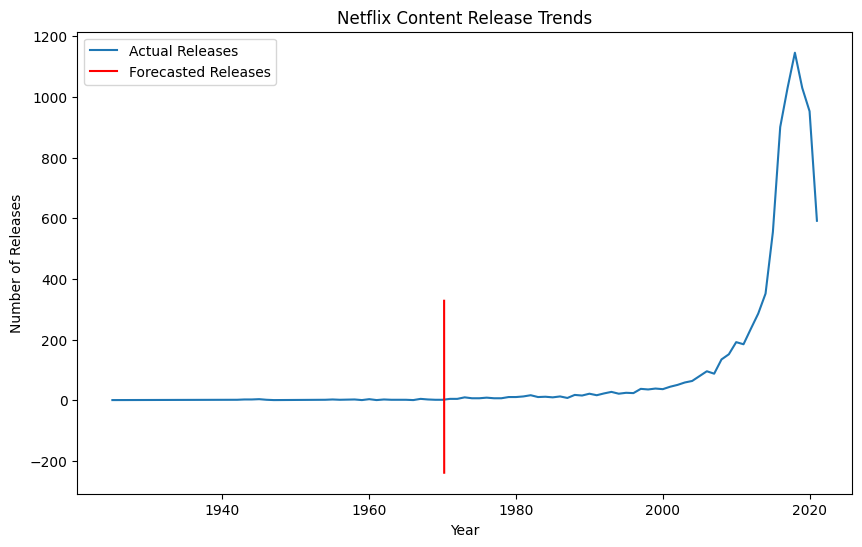

In [ ]:
## Visualize the Trend Prediction
import matplotlib.pyplot as plt

# Plot the actual data
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts, label='Actual Releases')
plt.plot(forecast.index, forecast, label='Forecasted Releases', color='red')
plt.title('Netflix Content Release Trends')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Prepare features and labels
X = df[['duration_numeric', 'num_genres', 'year_added', 'month_added']]
y = df['is_tv_show']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a basic Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.73%
